### Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

## ANSWER:

###  Solve By Using PCA:

#### Principal Component Analysis:  Technique used for reducing the dimensionality.

In [105]:
##Import Required libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [106]:
## Step 1: Loadung the dataset
wine = pd.read_csv("wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [107]:
## Considering only numenrical data
wine.data = wine.iloc[:,1:]
wine.data.head()

<ipython-input-107-104e355ab4c7>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
# Converting into numpy array
WINE = wine.data.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [109]:
# Normalizing the numerical data
wine_normal = scale(WINE)

In [110]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [111]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [112]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [113]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [114]:
# The amount of variance that each PCA eplains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [115]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100) # cumsum is cumilative sum
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 ])

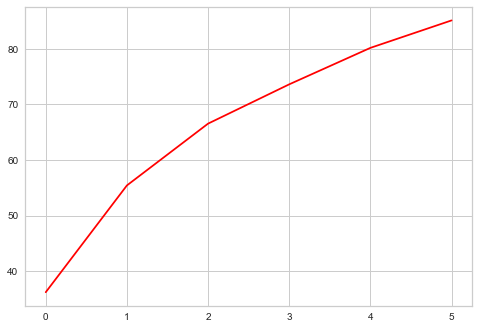

In [116]:
# Variance plot for PCA components obtained
plt.plot(var1, color='red')

In [117]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

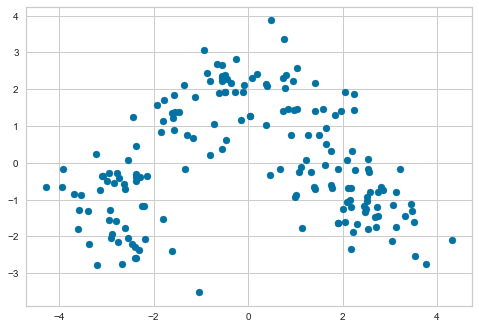

In [118]:
# Plot between PCA1 & PCA2
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z= pca_values[:2:3]

#Plot the scattering plot between x & y
plt.scatter(x,y)

In [119]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

In [120]:
print(finalDf.head())

        pc1       pc2  Type
0  3.316751 -1.443463     1
1  2.209465  0.333393     1
2  2.516740 -1.031151     1
3  3.757066 -2.756372     1
4  1.008908 -0.869831     1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

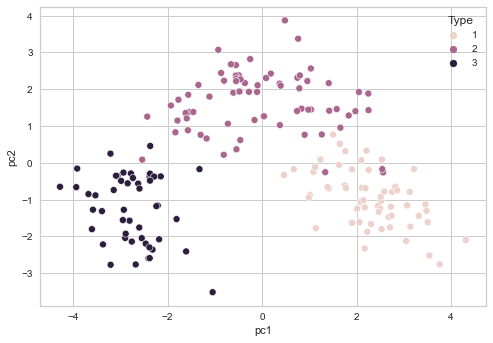

In [121]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

## K-means Clustering

In [122]:
# Standardize the data to normal distributio 
from sklearn import preprocessing
data_standardized  = preprocessing.scale(wine)
print(data_standardized)
data_standardized = pd.DataFrame(data_standardized)

[[-1.21394365  1.51861254 -0.5622498  ...  0.36217728  1.84791957
   1.01300893]
 [-1.21394365  0.24628963 -0.49941338 ...  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.19687903  0.02123125 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 1.37386437  0.33275817  1.74474449 ... -1.61212515 -1.48544548
   0.28057537]
 [ 1.37386437  0.20923168  0.22769377 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.37386437  1.39508604  1.58316512 ... -1.52437837 -1.42894777
  -0.59516041]]


### Elbow Graph (Screeplot)  is used to find the number of cluster.

In [123]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(wine)
    sse.append(km.inertia_)

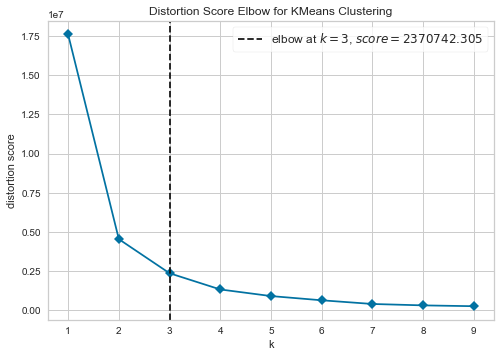

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings= False)
visualizer.fit(wine)
visualizer.show()

In [125]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(data_standardized)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [126]:
#Beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

#New list called cluster
cluster = list(y_kmeans1)
#Adding cluster to our data set
wine['cluster'] = cluster

In [127]:
#Mean of cluster 1 to 4 
kmeans_mean_cluster = pd.DataFrame(round(wine.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,,
1,3.0,13.2,3.3,2.4,21.4,99.0,1.7,0.8,0.5,1.2,7.3,0.7,1.7,627.6
2,1.0,13.7,2.0,2.5,17.3,107.8,2.8,3.0,0.3,1.9,5.4,1.1,3.2,1110.6
3,2.0,12.3,1.9,2.2,20.1,93.0,2.2,2.1,0.4,1.6,3.1,1.1,2.8,506.6


In [128]:
wine[wine['cluster']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,1
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,1
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,1
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,1
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,1
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,1
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,1
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,1
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,1
138,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580,1


## By using Train & Test Split method

In [199]:
x = wine.drop(["Type"], axis =1)

In [200]:
y = wine.Type

In [201]:
#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [203]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)

x_test = pca.transform(x_test)

explained_variane = pca.explained_variance_ratio_



In [205]:
explained_variane

array([0.36312381, 0.21887889])

In [206]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [207]:
y_pred = classifier.predict(x_test)

In [208]:
print("accuracy score:", accuracy_score(y_test,y_pred))


accuracy score: 0.9722222222222222


As we see that in predicting results our accuracy score came 0.97222222 is approx 97% which is good for predicting test set results.

